# Programming for Data Science and Artificial Intelligence

## 10. Unsupervised Learning - Clustering

### Readings:
- [VANDER] Ch5
- [HASTIE] Ch14.3
- https://scikit-learn.org/stable/modules/clustering.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## K-Means Clustering

In the clustering problem, we are given a training set $\{x^{(1)},\cdots,x^{(m)}\}$, and want to group the data into a few cohesive "clusters".  Clustering algorithms seek to learn, from the properties of the data, an optimal division or discrete labeling of groups of points.  Here, $x^{(i)} \in \mathbb{R}^n$ as usual, but **no labels $y^{(i)}$ are given**.  Thus, this is an unsupervised learning problem.  

The *k*-means clustering algorithm is as follows:

1. Define $k$
2. Initialize cluster centroids $\mu_1, \mu_2, \cdots, \mu_k \in \mathbb{R}^n$ randomly
3. Repeat until convergence: {
            
    For every $i$, set
            
   $$c^{(i)} :=\mathop{\arg\min}_{j} ||x^{(i)} - \mu_j||^2 $$
   
   where the right part is simply the Euclidean distance equation
   
   $$||x^{(i)} - \mu_j||^2 = d(x^{(i)}, x^{(i')}) = \Sigma_{j=1}^n (x^{ij} - x^{i'j})^2$$
   
   For each $j$, set
   
   $$\mu_j := \frac{\Sigma_{i=1}^m I\{c^{(i)} = j\}x^{(i)}}{\Sigma_{i=1}^m I\{c^{(i)} = j\}}$$
   
   }

In the algorithm above, $k$ is the number of clusters we want to find; and the cluster centroids $\mu_j$ represent our current guesses for the positions of the centers of the clusters. To initialize the cluster centroids, we could choose $k$ training examples randomly, and se thte cluster centroids to be equal to the values of these $k$ examples. (Note that other initialization methods are also possible).

The inner loop of the algorithm repeatedly carries out two steps: 

1. "Assigning" each training example $x^{(i)}$ to the closest cluster centroid $\mu_j$, where *closest* is defined using Euclidean distance.

2. Moving each cluster centroid $\mu_j$ to the mean of the points assigned to it.  The $k$th cluster centroid is the vector of the $n$ feature means for the observations in the $k$th cluster 

**Choosing k**

To choose $k$, we define "good" clusters as having minimum **within-cluster variation**  $W(c_k)$, using the following formula:

$$W(c_k) = \Sigma_{i \in c_k}^m \Sigma_{j=1}^{n} (x^{ij} - \bar{x}^{kj})^2$$

Here $x^{(k)}$ refers to the mean belong to class $k$.  In other words, the within-cluster variation for the $k$th cluster is the sum of squared Euclidean distances between the observations and mean across all features in the $k$th cluster.  Using this equation, we can come up with **total within-cluster variation** or sometimes we call **total sum of squares**

$$W(C) = \Sigma_{k=1}^{K}\Sigma_{i \in c_k}^m \Sigma_{j=1}^{n} (x^{ij} - \bar{x}^{kj})^2$$

We can say that best k should minimize the following objective function:

$$\mathop{\min}_{k} W(C) $$

**Convergence**

Is the $k$-means algorithm guranteed to converge? Yes it is, in a certain sense.  In particular, let us define the **distortion function** to be

$$J(c, \mu) = \Sigma_{i=1}^{m}||(x^{(i)} - \mu_{c^{(i)}}||^2$$

Thus, $J$ measures the sum of squared distances between each training example $x^{(i)}$ and the cluster centroid $\mu_{c^{(i)}}$ to which it has been assigned.  It can be shown that $k$-means is exctly coordinate descent on $J$.  Specifically, the inner-loop of $k$-means repeatedly minimizes $J$ with respect to $c$ while holding $\mu$ fixed, while holding $c$ fixed.  Thus, $J$ must monotonically decrease, and the value of $J$ must converge.  

The distortion function $J$ is a non-convex function, and so coordinate desent on $J$ is not guaranteed to converge to the global minimum.  One common way to tackle this is to run $k$-means many times using different random initial values for the cluster centroids $\mu_j$.  Then, out of all the different clusterings found, pick the one that gives the lowest distortion $J(c, \mu)$

**Relation to a bigger family of algorithm - Expectation-Maximization**

Expectation–maximization (E–M) is a powerful algorithm that comes up in a variety of contexts within data science.
*k*-means is a particularly simple and easy-to-understand application of the algorithm, and we will walk through it briefly here.
In short, the expectation–maximization approach here consists of the following procedure:

1. Guess some cluster centers
2. Repeat until converged
   1. *E-Step*: assign points to the nearest cluster center
   2. *M-Step*: set the cluster centers to the mean 

Here the "E-step" or "Expectation step" is so-named because it involves updating our expectation of which cluster each point belongs to.  The "M-step" or "Maximization step" is so-named because it involves maximizing some fitness function that defines the location of the cluster centers—in this case, that maximization is accomplished by taking a simple mean of the data in each cluster.

The literature about this algorithm is vast, but can be summarized as follows: under typical circumstances, each repetition of the E-step and M-step will always result in a better estimate of the cluster characteristics.

We can visualize the algorithm as shown in the following figure.
![](figures/em.png)

We shall soon explore a better EM algorithm called **Gaussian Mixture**.

### Scratch

Done in 14 iterations
Fit and predict time: 0.051245689392089844


Text(0.5, 1.0, 'Final result')

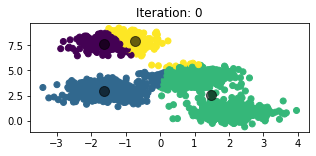

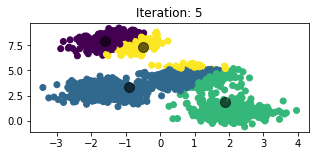

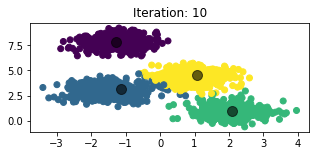

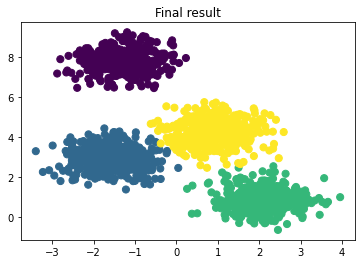

In [2]:
#Implement K-means from scratch
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances_argmin
from time import time

X, y_true = make_blobs(n_samples=1500, centers=4,
                       cluster_std=0.60, random_state=0)

def kmeans(X, n_clusters):
    m, n = X.shape

    #1. randomly choose n clusters from X
    #you can also randomly generate any two points
    rng = np.random.RandomState(42)
    i = rng.permutation(m)[:n_clusters]
    centers = X[i]

    iteration = 0

    while True:
        #2. assign lables based on closest center
        #return the index of centers having smallest
        #distance with X
        labels = pairwise_distances_argmin(X, centers)

        #3. find new centers
        new_centers = []
        for i in range(n_clusters):
            new_centers.append(X[labels == i].mean(axis=0))

        #convert list to np.array; you can actually combine #3
        #with np.array in one sentence 
        new_centers = np.array(new_centers)
        
        #plotting purpose
        #plot every 5th iteration to save space
        #remove this if, if you want to see each snapshot
        if (iteration % 5 == 0):
            pred = pairwise_distances_argmin(X, new_centers)
            plt.figure(figsize=(5, 2))
            plt.title(f"Iteration: {iteration}")
            plt.scatter(X[:, 0], X[:, 1], c=pred)
            plt.scatter(new_centers[:, 0], new_centers[:, 1], s=100, c="black", alpha=0.6)

        #4 stopping criteria - if centers do not 
        #change anymore, we stop!
        if(np.allclose(centers, new_centers)):
            break
        else:
            centers = new_centers
            iteration+=1
    
    print(f"Done in {iteration} iterations")
    return centers
        
def predict(X, centers):
    return pairwise_distances_argmin(X, centers)

start = time()
preds = predict(X, kmeans(X, n_clusters=4))
print(f"Fit and predict time: {time() - start}")
plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=preds, s=50)
plt.title("Final result")

### Sklearn

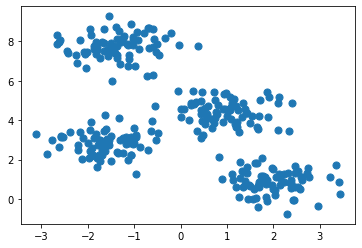

In [3]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

K-mean is an unsupervised algorithm that aims to cluster the data based on distances.

In [4]:
from sklearn.cluster import KMeans

#How did I know there are n_clusters = 4 (because I cheat!  But what if I don't know in advance?)
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
print(y_kmeans)

[2 0 3 0 2 2 1 3 0 0 1 0 3 0 2 3 3 2 1 1 2 2 3 1 1 3 2 3 1 3 0 0 3 0 0 0 0
 0 1 2 3 1 3 3 1 1 0 1 0 2 1 2 0 2 2 1 0 1 0 2 0 3 0 1 1 1 0 2 0 1 3 1 0 1
 1 0 1 3 2 0 2 3 2 2 0 3 2 3 0 0 3 2 0 1 1 3 2 2 3 1 0 2 0 2 3 2 2 3 0 3 1
 1 2 0 2 3 0 2 2 3 1 2 1 2 2 2 2 1 2 1 0 1 1 2 0 1 1 0 3 0 0 1 3 1 3 1 0 3
 0 0 0 3 0 3 2 1 0 1 2 3 0 3 3 2 3 1 1 3 2 3 3 0 2 3 1 0 2 2 3 1 2 3 1 1 3
 3 3 3 2 0 3 1 3 3 1 1 1 3 1 0 3 1 2 1 3 0 1 0 3 0 3 1 3 3 0 1 1 2 2 3 0 2
 2 1 2 1 3 0 0 3 3 0 3 2 1 3 2 1 0 1 2 3 2 0 0 0 0 1 1 0 3 1 2 3 1 1 1 2 2
 0 3 3 1 2 0 1 3 0 3 2 2 1 1 3 2 2 2 3 0 0 2 2 3 2 2 2 0 1 0 3 2 2 0 0 0 2
 2 3 0 1]


Let's visualize.

Centers:  [[-1.37324398  7.75368871]
 [-1.58438467  2.83081263]
 [ 1.98258281  0.86771314]
 [ 0.94973532  4.41906906]]


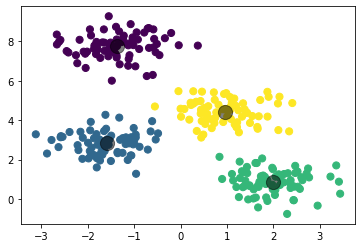

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
print("Centers: ", centers)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

#### How to know how many clusters?

Text(5, 600, 'elbow')

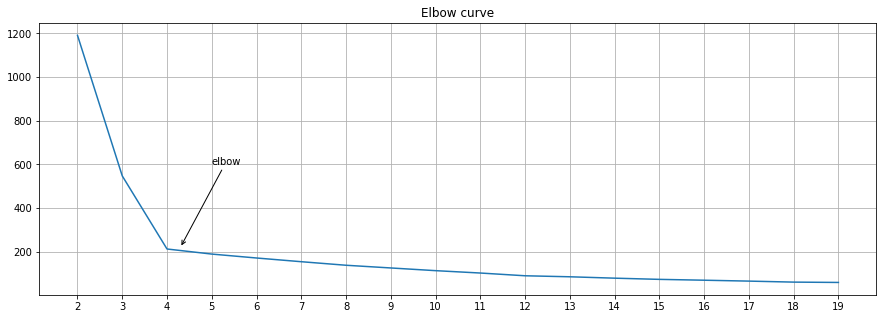

In [6]:
#sum of squared distances
ssd = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    ssd.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), ssd)
plt.xticks(range(2, 20))
plt.grid(True)
plt.title('Elbow curve')

plt.annotate('elbow', xy=(4.3, 220), xytext=(5, 600),  #xytext ---> xy
            arrowprops=dict(arrowstyle="->"))



#### K-means assumes equal-sized spherical distribution

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(200, noise=.05, random_state=0)

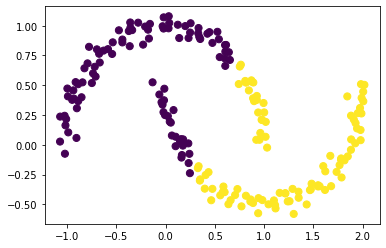

In [8]:
labels = KMeans(2, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

### Example: k-means on digits

Here we will attempt to use *k*-means to try to identify similar digits *without using the original label information*; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any *a priori* label information.

We will start by loading the digits and then finding the ``KMeans`` clusters.
Recall that the digits consist of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image:

In [9]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [10]:
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(digits.data)
kmeans.cluster_centers_.shape

(10, 64)

The result is 10 clusters in 64 dimensions.
Notice that the cluster centers themselves are 64-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster.
Let's see what these cluster centers look like:

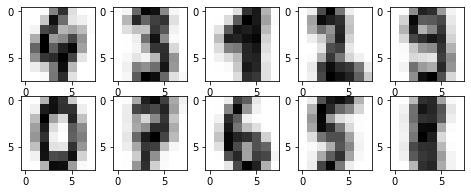

In [11]:
fig, ax = plt.subplots(2, 5, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(10, 8, 8)
for axi, center in zip(ax.flat, centers):
    axi.imshow(center, cmap=plt.cm.binary)

We see that *even without the labels*, ``KMeans`` is able to find clusters whose centers are recognizable digits, with perhaps the exception of 8.

Because *k*-means knows nothing about the identity of the cluster, the 0–9 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

Accuracy score:  0.7952142459654981


Text(433.5, 0.5, 'True')

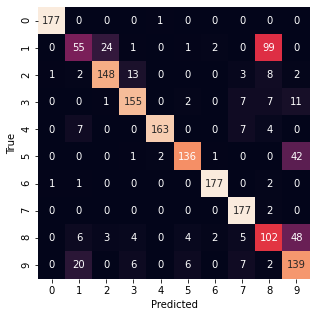

In [12]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns

pred = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    #mode to get the most correctly classified
    pred[mask] = mode(digits.target[mask])[0]
    
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(digits.target, pred))
mat = confusion_matrix(digits.target, pred)
plt.figure(figsize=(16, 5))
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")

The main point of confusion is between the eights and ones.
But this still shows that using *k*-means, we can essentially build a digit classifier *without reference to any known labels*!

Just for fun, let's try to push this even farther.
We can use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing *k*-means.

In [13]:
from sklearn.manifold import TSNE

# Project the data: this step will take several seconds
tsne = TSNE(n_components=2, random_state=0)
projected_X = tsne.fit_transform(digits.data)

# Compute the clusters
kmeans = KMeans(n_clusters=10, random_state=0)
clusters = kmeans.fit_predict(projected_X)

# Permute the labels
pred = np.zeros_like(clusters)
for i in range(10):
    mask = (clusters == i)
    pred[mask] = mode(digits.target[mask])[0]

# Compute the accuracy
accuracy_score(digits.target, pred)

#yay, after cleaning some noise, we got even higher accuracy!

0.9371174179187535

#### K-means does not work well with uneven size clusters

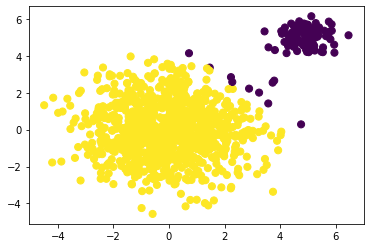

In [14]:
n_samples_1 = 1000
n_samples_2 = 100
centers = [[0.0, 0.0], [5.0, 5.0]]
clusters_std = [1.5, 0.5]
X, y = make_blobs(n_samples=[n_samples_1, n_samples_2],
                  centers=centers,
                  cluster_std=clusters_std,
                  random_state=0, shuffle=False)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')



### When to use K-means

1.  May not guarantee optimal solution.  Depends on initialization.  Can be fix by running k-means many times with different init random values.

2. Require knowing how many clusters beforehand.  Simple way is to use the elbow method which compute within clusters distances.  In sklearn, this can be easily computed using <code>kmeans inertia_ variable</code>. For scratch, this is your exercise!  

3. Assume spherical distribution.  This also means that all k-means assume that clusters have equal number of samples (which may not be true!)

4. Similar to K-nearest neighbors and MDS, k-means can be ridiciously slow for large number of samples.  One way to fix this is using the concept of Mini-Batch.  It is implemented in <code>sklearn.cluster.MiniBatchMeans</code>.  For scratch, this will be another of your exercise!

### ===Task===

Your work: Let's modify the above scratch code:
- Modify so it print out the total within-cluster variation.  Then try to run several k and identify which k is best.
- Since k-means can be slow due to its pairwise computations, let's implement a mini-batch k-means in which the cluster is create using only partial subset of samples.
- Put everything into a class

## Gaussian Mixture Models

Instead of simply assuming a spherical (circular) shape, we can generalize the Expectation-Maximization algorithm to "weighted sum" of gaussian distribution, we can create a more powerful model - essentially **Gaussian Mixture models**

Under the hood, a Gaussian mixture model is very similar to *k*-means: it uses an expectation–maximization approach which qualitatively does the following:

1. Choose starting guesses for the location and shape

2. Repeat until converged:

   1. *E-step*: for each point, find weights encoding the probability of membership in each cluster
   2. *M-step*: for each cluster, update its location, normalization, and shape based on *all* data points, making use of the weights

The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model.
Just as in the *k*-means expectation–maximization approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.


/Users/chaklam/DSAI/Environments/teaching_env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


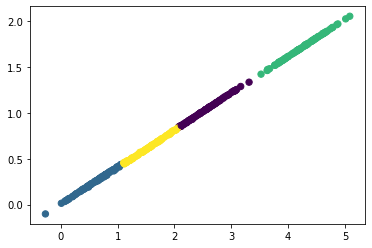

In [15]:
from sklearn.datasets.samples_generator import make_blobs
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
#stretch the X a bit
X_stretched = X @ np.random.rand(2, 2)

kmeans = KMeans(n_clusters=4)
kmeans.fit(X_stretched)
pred = kmeans.predict(X_stretched)

plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=pred, s=40, cmap='viridis')

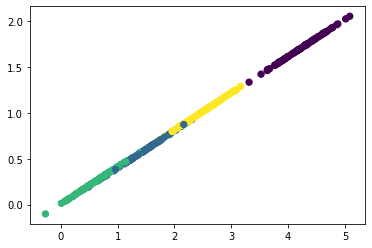

In [16]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=4, random_state=42)
gmm.fit(X_stretched)
pred = gmm.predict(X_stretched)
plt.scatter(X_stretched[:, 0], X_stretched[:, 1], c=pred, s=40, cmap='viridis')

Because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments—in Scikit-Learn this is done using the ``predict_proba`` method. This returns a matrix of size ``[n_samples, n_clusters]`` which measures the probability that any point belongs to the given cluster:

In [17]:
probs = gmm.predict_proba(X_stretched)
print(probs[:10].round(3))

[[0.762 0.    0.    0.238]
 [0.    1.    0.    0.   ]
 [0.    1.    0.    0.   ]
 [0.    0.    0.    1.   ]
 [0.    1.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [0.    0.019 0.    0.981]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]]


### GMM as Density Estimation

Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for *density estimation*.
That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.

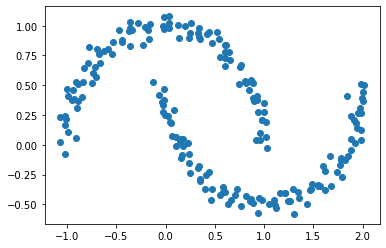

In [18]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

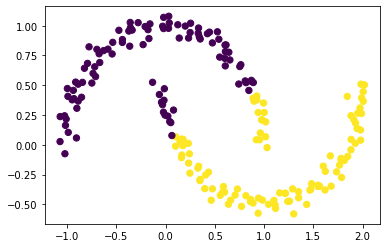

In [19]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
pred = gmm2.fit(Xmoon).predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=pred, s=40, cmap='viridis')

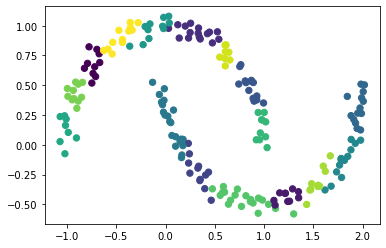

In [20]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
pred = gmm16.fit(Xmoon).predict(Xmoon)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1], c=pred, s=40, cmap='viridis')

Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall *distribution* of the input data.
This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input.
For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

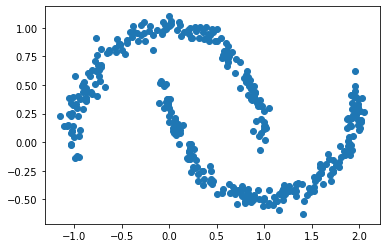

In [21]:
Xnew, _ = gmm16.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])

The above data is a "generated" data - not real data.  So by understanding the distribution, it is useful to generate the data

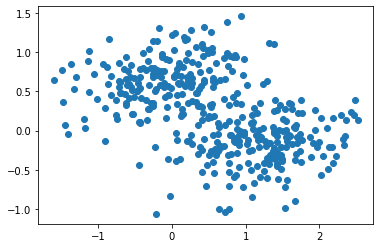

In [22]:
#Let's also take a look on gmm2.sample
Xnew, _ = gmm2.sample(400)
plt.scatter(Xnew[:, 0], Xnew[:, 1])

### How many components for understanding distribution?

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset.
A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the *likelihood* of the data under the model, using cross-validation to avoid over-fitting.

Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion)

$$ AIC = 2k - 2ln(L) $$

$$ BIC = kln(n) - 2ln(L) $$

where k is the number of features and L is maximum likelihood.  Basically,  number of features will increase AIC, while L will decrease AIC.  We want to good balance between model complexity and goodness of fit, thus lower the AIC, the better.

Scikit-Learn's ``GMM`` estimator actually includes built-in methods that compute AIc, and so it is very easy to operate on this approach.

Let's look at the AIC as a function as the number of GMM components for our moon dataset:

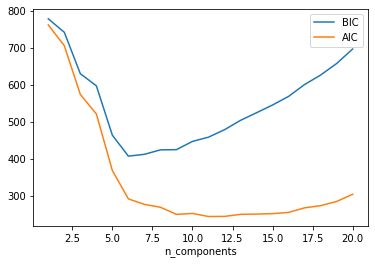

In [23]:
n_components = np.arange(1, 21)
models = [GMM(n, random_state=0).fit(Xmoon)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 16 components above was probably too many: around 8-12 components would have been a better choice.
As is typical with this sort of problem, the BIC recommends a simpler model.

Notice the important point: this choice of number of components measures how well GMM works *as a density estimator*, not how well it works *as a clustering algorithm*.
I'd encourage you to think of GMM primarily as a density estimator, and use it for clustering only when warranted within simple datasets.

### Example: GMM for Generating New Data

Here, since GMM is kind of model that tries to understand the data probability distribution.  GMM can be used to generate *new handwritten digits* from the standard digits corpus that we have used before.

To start with, let's load the digits data using Scikit-Learn's data tools:

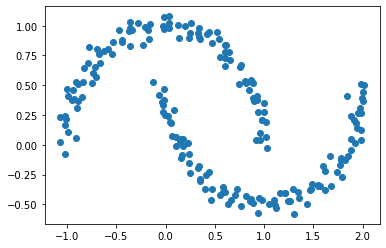

In [24]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

In [25]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)
plot_digits(digits.data)

We have nearly 1,800 digits in 64 dimensions, and we can build a GMM on top of these to generate more.
GMMs can have difficulty converging in such a high dimensional space, so we will start with an invertible dimensionality reduction algorithm on the data.
Here we will use a straightforward PCA, asking it to preserve 99% of the variance in the projected data:

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(digits.data)
data.shape  #41 dimensions

The result is 41 dimensions, a reduction of nearly 1/3 with almost no information loss.
Given this projected data, let's use the AIC to get a gauge for the number of GMM components we should use:

In [ ]:
n_components = np.arange(50, 210, 10)
models = [GMM(n, random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

It appears that around 110 components minimizes the AIC; we will use this model.
Let's quickly fit this to the data and confirm that it has converged:

In [ ]:
gmm = GMM(110, covariance_type='full', random_state=0)
gmm.fit(data)
print(gmm.converged_)

Now we can draw samples of 100 new points within this 41-dimensional projected space, using the GMM as a generative model:

In [ ]:
X, y = gmm.sample(100)
X.shape

*Finally*, we can use the inverse transform of the PCA object to construct the new digits:

In [ ]:
digits_new = pca.inverse_transform(X)
plot_digits(digits_new)

Consider what we've done here: given a sampling of handwritten digits, we have modeled the distribution of that data in such a way that we can generate brand new samples of digits from the data: these are "handwritten digits" which do not individually appear in the original dataset, but rather capture the general features of the input data as modeled by the mixture model.
Such a generative model of digits is perhaps the basic idea behind **"Generative Adversarial Network"**

### Using kernel trick - Spectral Clustering

Of course, similar to SVM and PCA, we might imagine using the same trick to allow *k*-means to discover non-linear boundaries.  One version of this kernelized *k*-means is implemented in Scikit-Learn within the ``SpectralClustering`` estimator.
It uses the graph of nearest neighbors to compute a higher-dimensional representation of the data, and then assigns labels using a *k*-means algorithm:

In [ ]:
from sklearn.cluster import SpectralClustering
model = SpectralClustering(n_clusters=2, affinity='nearest_neighbors',
                           assign_labels='kmeans')
labels = model.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');